In [40]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [41]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'c

In [42]:
data, info = tfds.load('mnist',  with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [43]:
data.keys()

dict_keys(['train', 'test'])

In [44]:
train = data['train']
print(len(train))

train = train.map(lambda x : (x['image'], x['label']))
train = train.shuffle(12000).batch(60000)
batch = next(iter(train))
print(batch[0].shape, batch[1].shape)

train_images, train_labels = batch 
train_images = train_images.numpy()
train_labels = train_labels.numpy()
print(train_images.shape, type(train_images), train_labels.shape, type(train_labels))

60000
(60000, 28, 28, 1) (60000,)
(60000, 28, 28, 1) <class 'numpy.ndarray'> (60000,) <class 'numpy.ndarray'>


In [45]:
test = data['test']
print(len(test))

test = test.map(lambda x : (x['image'], x['label']))
test = test.shuffle(2000).batch(10000)
batch = next(iter(test))
print(batch[0].shape, batch[1].shape)

test_images, test_labels = batch
test_images = test_images.numpy()
test_labels = test_labels.numpy()
print(test_images.shape, type(test_images), test_labels.shape, type(test_labels))

10000
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) <class 'numpy.ndarray'> (10000,) <class 'numpy.ndarray'>


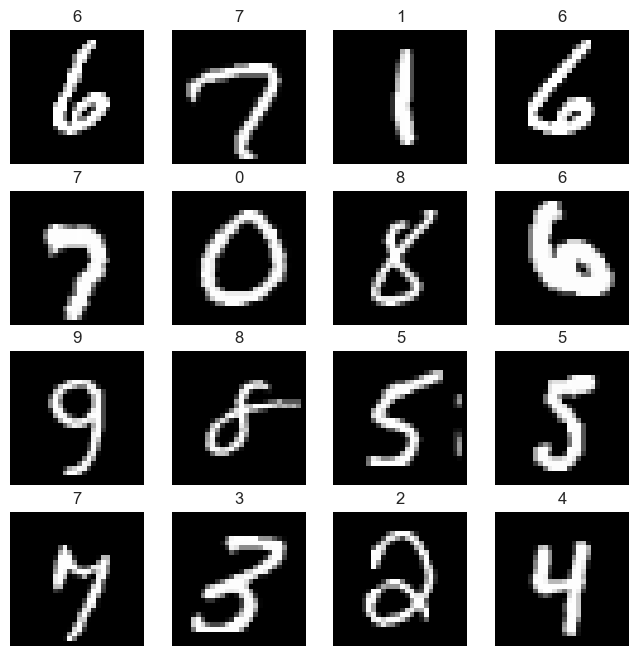

In [46]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, len(train_images), size=16)

for i, idx in enumerate(random_idx) :

    img = train_images[idx]
    label = train_labels[idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.show()

In [47]:
from tensorflow.keras.utils import to_categorical

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten(input_shape=[28, 28, 1]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# # checkpoint = ModelCheckpoint("./model/model.keras", monitor="val_loss", mode="min", save_best_only=True, verbose=1)
# earlystopping = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode='min')
# # tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, embeddings_freq=1, write_graph=True, write_images=True)
# reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1, min_lr=0.00001)

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_split=0.2,)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7441 - loss: 0.8000 - val_acc: 0.9506 - val_loss: 0.1723
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9374 - loss: 0.2260 - val_acc: 0.9584 - val_loss: 0.1428
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9490 - loss: 0.1786 - val_acc: 0.9653 - val_loss: 0.1237
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9570 - loss: 0.1496 - val_acc: 0.9690 - val_loss: 0.1118
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9650 - loss: 0.1240 - val_acc: 0.9692 - val_loss: 0.1142
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9676 - loss: 0.1144 - val_acc: 0.9725 - val_loss: 0.1052
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9696 - loss: 0.1046 - val_acc: 0.9725 - val_loss: 0.1026
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9737 - loss: 0.0915 - val_acc: 0.9736 - val_loss: 0.1022
Epoch 9/30
1500/1500 ━━━━━━━━━━━━━━━━━━━

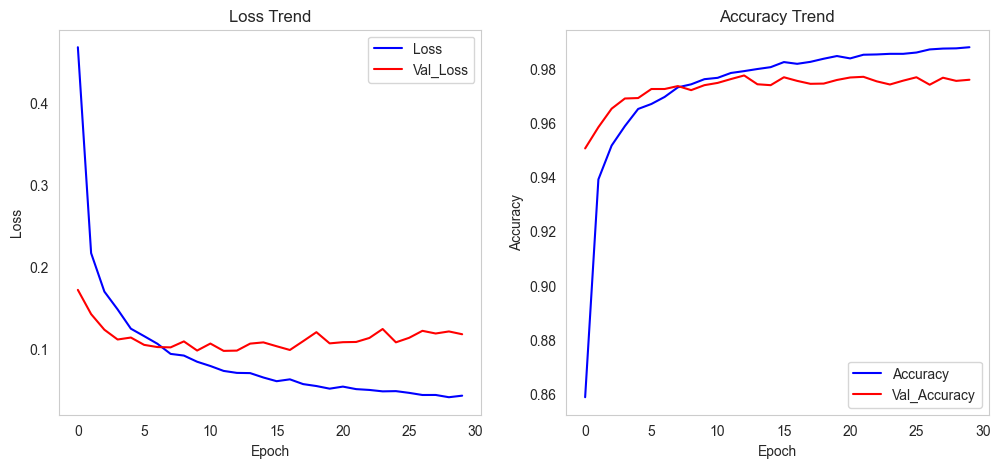

In [54]:
from turtle import color


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue' )
plt.plot(history.history['val_loss'], label='Val_Loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Accuracy', color='blue')
plt.plot(history.history['val_acc'], label='Val_Accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [51]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - acc: 0.9795 - loss: 0.1026


[0.10257136076688766, 0.9794999957084656]

In [52]:
pred_ys = model.predict(test_images)
print(pred_ys[0])
print(np.argmax(pred_ys[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[5.4311298e-21 7.6412208e-16 1.0000000e+00 3.1394490e-14 1.3285432e-18
 2.9134852e-25 1.8519558e-21 1.1300234e-15 1.8322941e-21 1.0410191e-21]
2


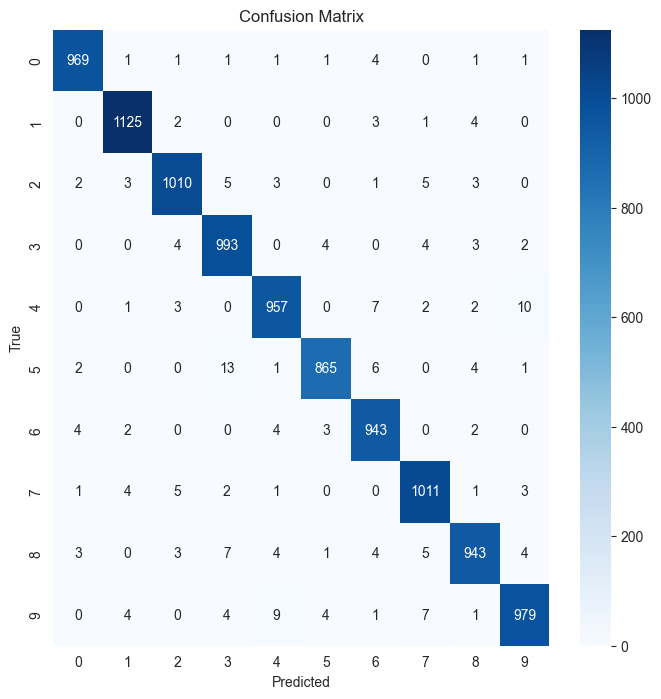

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))

sns.set_style("whitegrid")
cm = confusion_matrix(np.argmax(test_labels, axis = -1), np.argmax(pred_ys, axis= -1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True')
plt.xlabel("Predicted")
plt.title("Confusion Matrix")

plt.show()